# Sparse Hebbian Learning : testing two different learning rates strategies

1- Dictionary initialized as 2D White Noise

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [3]:
from shl_scripts.shl_experiments import SHL

list_figures = ['show_dico']#, 'rec_error', 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 10, 100
DEBUG_DOWNSCALE, verbose = 1, 10
N_scan = 7
tag = 'learning-rates'
opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, homeo_method='HAP',
              learning_algorithm='mp', verbose=verbose)
shl = SHL(**opts)
data = shl.get_data(matname='data')

Extracting data..loading the data called : /tmp/data_cache/data_data
Data is of shape : (81920, 576) - done in 1.82s.


## fixed learning rate

No cache found /tmp/data_cache/learning-rates_fixed_dico.pkl: Learning the dictionary with algo = mp 
 Training on 81920 patches... dooh!
Iteration   0 /   1024 (elapsed time:   0s,  0.0mn)
Iteration  103 /   1024 (elapsed time:   4s,  0.0mn)
Iteration  206 /   1024 (elapsed time:   8s,  0.0mn)
Iteration  309 /   1024 (elapsed time:  11s,  0.0mn)
Iteration  412 /   1024 (elapsed time:  15s,  0.0mn)
Iteration  515 /   1024 (elapsed time:  19s,  0.0mn)
Iteration  618 /   1024 (elapsed time:  22s,  0.0mn)
Iteration  721 /   1024 (elapsed time:  26s,  0.0mn)
Iteration  824 /   1024 (elapsed time:  31s,  0.0mn)
Iteration  927 /   1024 (elapsed time:  37s,  0.0mn)
Learning code... done (total time:  43s,  0.7mn)
done in 43.32s.


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


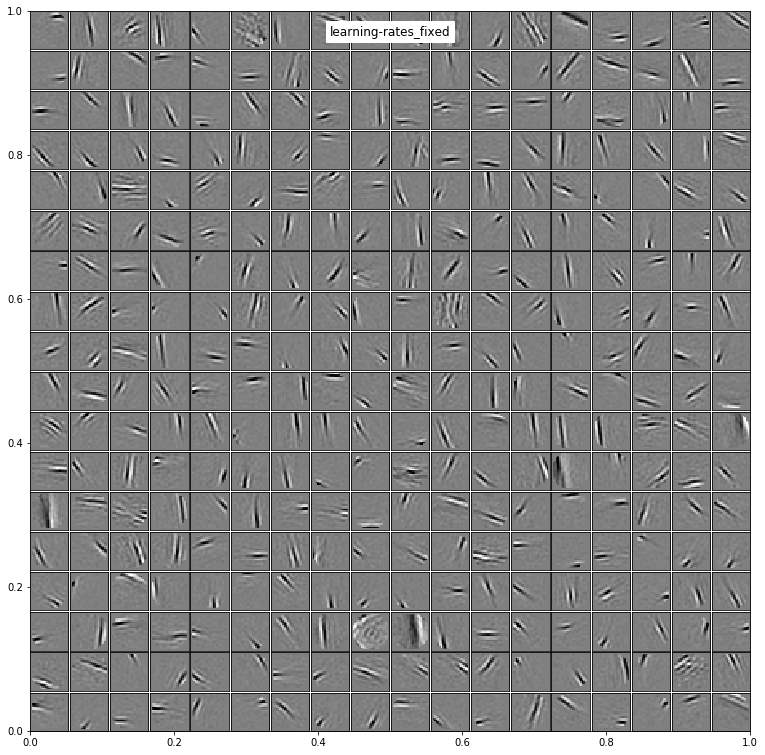

In [5]:
matname = tag + '_fixed'
shl = SHL(eta=0.01, **opts)
dico_fixed = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)

## ADAM

See https://arxiv.org/pdf/1412.6980.pdf

No cache found /tmp/data_cache/learning-rates_ADAM_dico.pkl: Learning the dictionary with algo = mp 
 Training on 81920 patches... Iteration   0 /   1024 (elapsed time:   0s,  0.0mn)
Iteration  103 /   1024 (elapsed time:   5s,  0.0mn)
Iteration  206 /   1024 (elapsed time:  10s,  0.0mn)
Iteration  309 /   1024 (elapsed time:  15s,  0.0mn)
Iteration  412 /   1024 (elapsed time:  20s,  0.0mn)
Iteration  515 /   1024 (elapsed time:  25s,  0.0mn)
Iteration  618 /   1024 (elapsed time:  29s,  0.0mn)
Iteration  721 /   1024 (elapsed time:  35s,  0.0mn)
Iteration  824 /   1024 (elapsed time:  43s,  0.0mn)
Iteration  927 /   1024 (elapsed time:  51s,  0.0mn)
Learning code... done (total time:  57s,  1.0mn)
done in 57.69s.


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


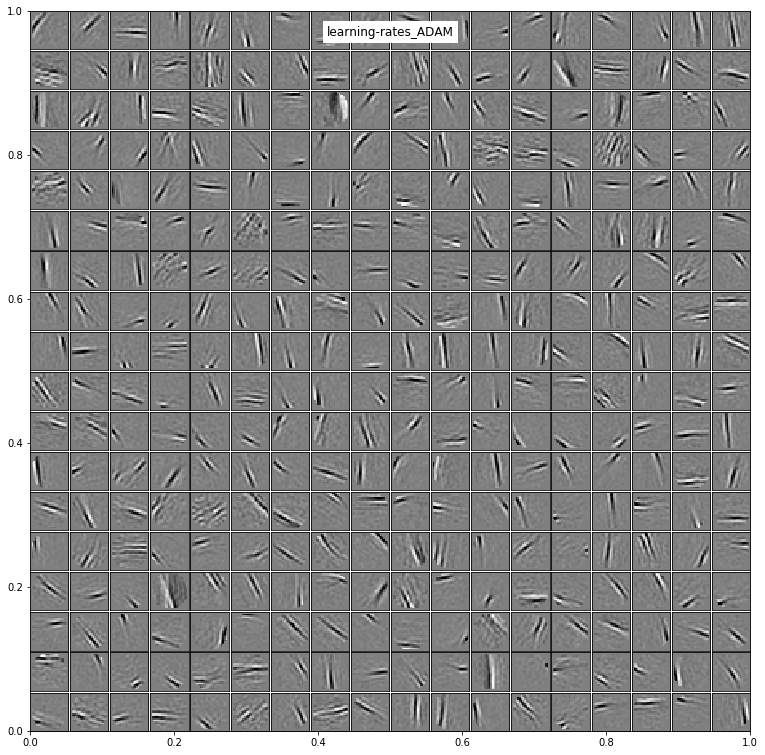

In [6]:
matname = tag + '_ADAM'
shl = SHL(eta=dict(alpha=.002, beta1=.9, beta2=.999, epsilon=1.e-8), **opts)
dico_adam = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)

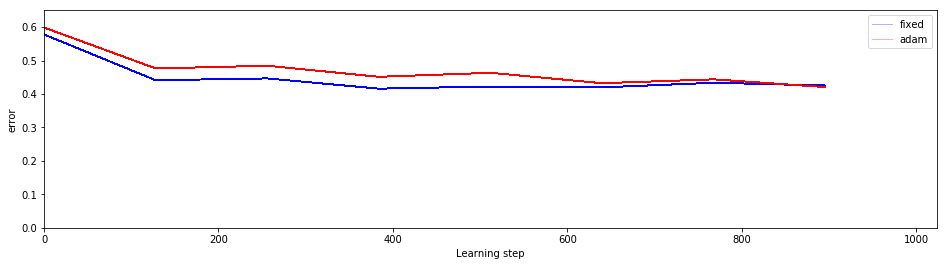

In [7]:
fig_error, ax_error = None, None
fig_error, ax_error = shl.time_plot(dico_fixed, variable='error', fig=fig_error, ax=ax_error, color='blue', label='fixed')
fig_error, ax_error = shl.time_plot(dico_adam, variable='error', fig=fig_error, ax=ax_error, color='red', label='adam')
ax_error.set_ylim((0, .65))
ax_error.legend(loc='best');